In [1]:
from google.colab import drive

drive.mount('/content/drive');

Mounted at /content/drive


In [31]:
import nltk

from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist

from string import punctuation

In [ ]:
# nltk.download('popular');

#### **Remover StopWords**

In [40]:
def remove_stop_words(text):
  stop_words = set(stopwords.words('english') + list(punctuation));
  tokens = word_tokenize(text);
  return [word for word in tokens if word.lower().strip() not in stop_words];

#### **Remover palavras de dois dígitos e numeração**

In [41]:
def remove_two_lenght_and_digits(text):
  return [word for word in text if len(word) > 2 and not word.isdigit()];

#### **Processo de stemmezar as palavras**
*Retorna a sua origem, ou seja, palavras podem possuir mais de uma conjugação, então utilizamos esse processo para retornar a sua versão radical*

In [42]:
def stem_porter(tokens):
  porter = PorterStemmer();
  return [porter.stem(word) for word in tokens];

def stem_snowball(tokens):
  snowball = SnowballStemmer("english");
  return [snowball.stem(word) for word in tokens];

def stem_lancaster(tokens): 
  lancaster = LancasterStemmer();
  return [lancaster.stem(word) for word in tokens];

#### **Obtém a frequência das palavras**

In [43]:
def search_frequency(tokens):
  return [FreqDist(tokens), FreqDist(tokens).keys(), FreqDist(tokens).most_common()];

#### ***Função responsável por ler as constituções***
*Função lê as constituições e separa em um dicionário os capitulos, os artigos e os preambulos*

In [66]:
PATH = '/content/drive/MyDrive/Colab Notebooks/';
FILE = 'China_1982.txt';

with open(PATH+FILE, 'r') as file:
  constitute = file.read();

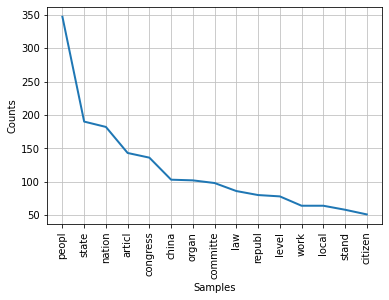

In [72]:
without_stop_word = remove_stop_words(constitute);
without_stop_word = remove_two_lenght_and_digits(without_stop_word);
stems = stem_snowball(without_stop_word);
[freq, keys, most_common] = search_frequency(stems);

freq.plot(15, cumulative=False);